# Стохастический градиентный и координатный спуски

## Загрузка и подготовка данных (1 балл)

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [114]:
#ваш код 

# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Загрузка данных
df = pd.read_csv('data/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [115]:
#ваш код 

# удалим первый столбец, так как он является индексом
df = df.drop(columns=['Unnamed: 0'])

print("Количество пропусков по столбцам:")
missing_values = df.isnull().sum()
print(missing_values)
print("\n")
print('Размер таблицы до удаления дубликатов: {}'.format(df.shape))
print('Найдено дубликатов: {}'.format(df[df.duplicated()].shape[0]))
df = df.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(df.shape))

Количество пропусков по столбцам:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


Размер таблицы до удаления дубликатов: (200, 4)
Найдено дубликатов: 0
Размер таблицы после удаления дубликатов: (200, 4)



Basic statistics:
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


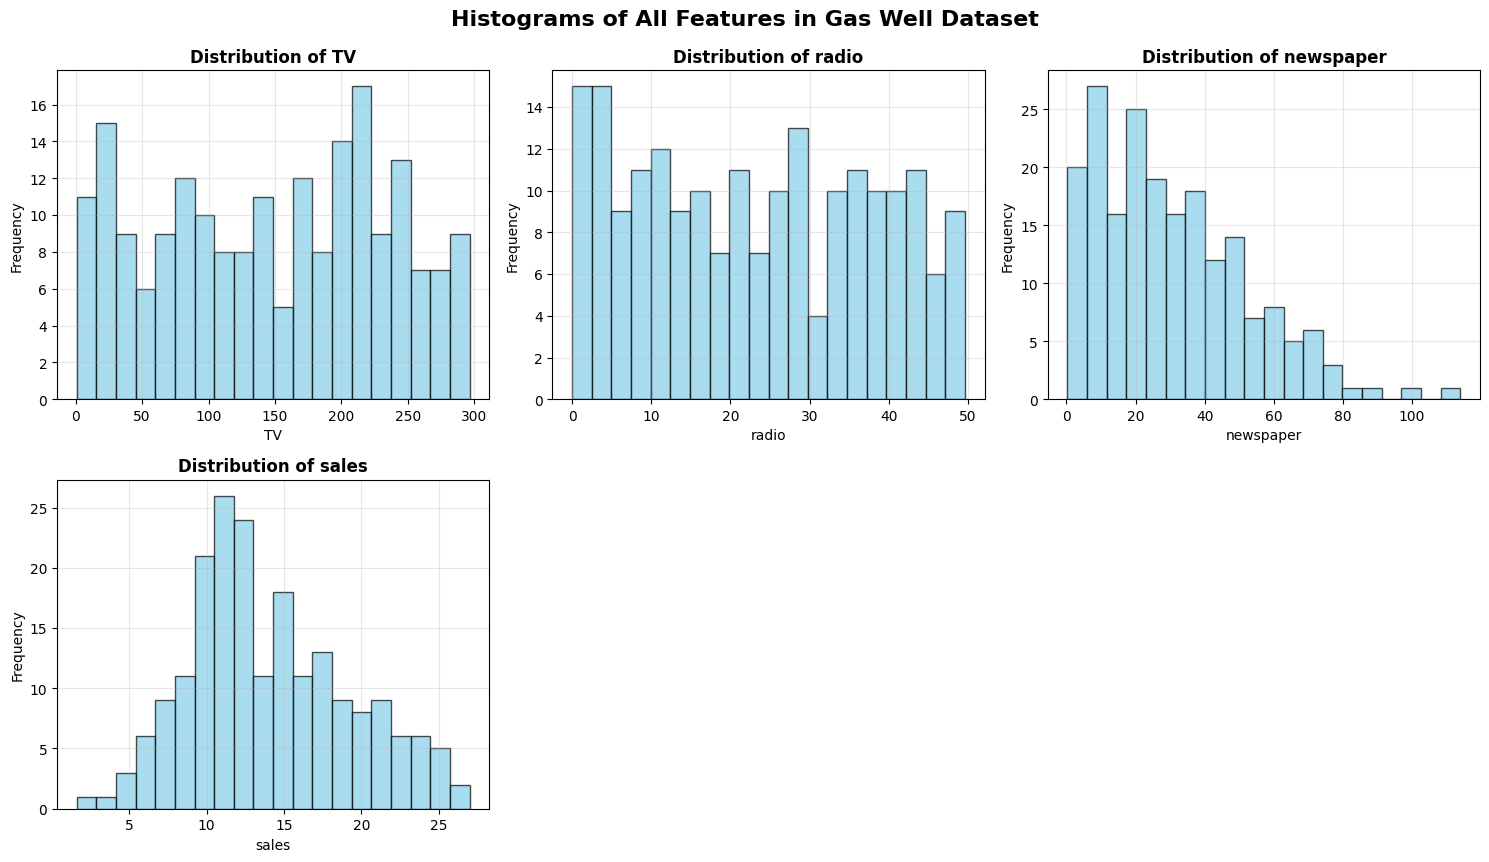

In [116]:
#ваш код 

# Build Histograms for all features
print("\nBasic statistics:")
print(df.describe())

# Create histograms for all columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Get all numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
for i, column in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].hist(df[column], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {column}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Histograms of All Features in Gas Well Dataset', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [117]:
#ваш код 

# Создаем матрицу признаков X (предикторы): TV, radio, newspaper  
X = df[['TV', 'radio', 'newspaper']].values

# Создаем вектор целевой переменной y: sales
y = df['sales'].values

## Координатный спуск (2 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [118]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [119]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [120]:
# ваш код 

# Реализация координатного спуска для линейной регрессии
def coordinate_descent(X, y, num_iters=1000):
    m, n = X.shape  # m - количество наблюдений, n - количество признаков
    w = np.zeros((n, 1))  # Вектор весов размера n x 1, состоящий из нулей
    cost_history = []  # История изменения функции потерь
    
    # Основной цикл координатного спуска
    for t in range(num_iters):
        # Обновляем каждый параметр w_k поочередно
        for k in range(n):
            # Вычисляем прогноз без k-ого признака
            # h_i = сумма всех признаков кроме k-ого
            if k == 0:
                # Если k=0, берем только признаки с индексами 1 и далее
                h = X[:, k+1:] @ w[k+1:]
            elif k == n-1:
                # Если k последний, берем только признаки до k
                h = X[:, 0:k] @ w[0:k]
            else:
                # Общий случай: берем признаки до k и после k
                h = (X[:, 0:k] @ w[0:k]) + (X[:, k+1:] @ w[k+1:])
            
            # Обновляем k-ый коэффициент: w_k = x_k^T * (y - h)
            w[k] = X[:, k].T @ (y.flatten() - h.flatten())
        
        # Вычисляем полный прогноз и функцию потерь
        y_pred = X @ w
        cost = np.mean((y - y_pred) ** 2)  # MSE
        cost_history.append(cost)  
    print(f"Финальная MSE: {cost_history[-1]:.6f}")
    return w, cost_history

# Запуск координатного спуска
weights_cd, cost_history_cd = coordinate_descent(X, y, num_iters=1000)

print(f"\nВеса модели (координатный спуск):")
for i, weight in enumerate(weights_cd.flatten()):
    feature_names = ['intercept', 'TV', 'radio', 'newspaper']
    print(f"w_{i} ({feature_names[i]}): {weight:.6f}")

print(f"\nВектор весов: {weights_cd.flatten()}")

Финальная MSE: 2.784126

Веса модели (координатный спуск):
w_0 (intercept): 41.562172
w_1 (TV): 110.131442
w_2 (radio): 73.528606
w_3 (newspaper): -0.550064

Вектор весов: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [121]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(f"Веса модели (sklearn):")
print(model.coef_)

y_pred_sklearn = model.predict(X).reshape(-1, 1)
mse_sklearn = np.mean((y - y_pred_sklearn) ** 2)
print(f"MSE sklearn: {mse_sklearn:.8f}")

print("\nВеса модели (Sklearn LinearRegression):")
sklearn_weights = model.coef_.flatten()
for i, weight in enumerate(sklearn_weights):
    feature_names = ['intercept', 'TV', 'radio', 'newspaper']
    print(f"  w_{i} ({feature_names[i]}): {weight:.8f}")

Веса модели (sklearn):
[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]
MSE sklearn: 2.78412631

Веса модели (Sklearn LinearRegression):
  w_0 (intercept): 41.56217205
  w_1 (TV): 110.13144155
  w_2 (radio): 73.52860638
  w_3 (newspaper): -0.55006384


Если вы все сделали верно, они должны практически совпасть!

> Вывод: результаты совпали как и ожидалось (*координатный спуск vs. Sklearn LinearRegression*)

## Стохастический градиентный спуск (7 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [122]:
#ваш код

# Создаем новую матрицу X из исходных данных для стохастического градиентного спуска
X = df[['TV', 'radio', 'newspaper']].values

# Вычисляем среднее и стандартное отклонение для каждого признака
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
print(f"\nСтатистики по признакам:")
feature_names = ['TV', 'radio', 'newspaper']
for i, feature in enumerate(feature_names):
    print(f"{feature}: mean = {means[i]:.4f}, std = {stds[i]:.4f}")

# Стандартизация: (x - mean) / std
X_scaled = (X - means) / stds

# Проверяем, что стандартизация прошла корректно
print(f"\nПроверка стандартизации:")
new_means = np.mean(X_scaled, axis=0)
new_stds = np.std(X_scaled, axis=0)
for i, feature in enumerate(feature_names):
    print(f"{feature}: новое среднее = {new_means[i]:.6f}, новое std = {new_stds[i]:.6f}")
    
# Сохраняем стандартизированную матрицу
X = X_scaled.copy()


Статистики по признакам:
TV: mean = 147.0425, std = 85.6393
radio: mean = 23.2640, std = 14.8096
newspaper: mean = 30.5540, std = 21.7241

Проверка стандартизации:
TV: новое среднее = 0.000000, новое std = 1.000000
radio: новое среднее = -0.000000, новое std = 1.000000
newspaper: новое среднее = 0.000000, новое std = 1.000000


**Добавим единичный столбец**

In [123]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [124]:
#ваш код

# Формула: MSE = (1/n) * Σ(y_true - y_pred)²
def mse_error(y_true, y_pred):
    # Приводим к numpy массивам и обеспечиваем одинаковые размерности
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    # Проверяем, что размерности совпадают
    if len(y_true) != len(y_pred):
        raise ValueError(f"Размерности не совпадают: y_true={len(y_true)}, y_pred={len(y_pred)}")
    # Вычисляем MSE
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза**

Среднее значение продаж: 14.0225
MSE наивного прогноза: 27.085744


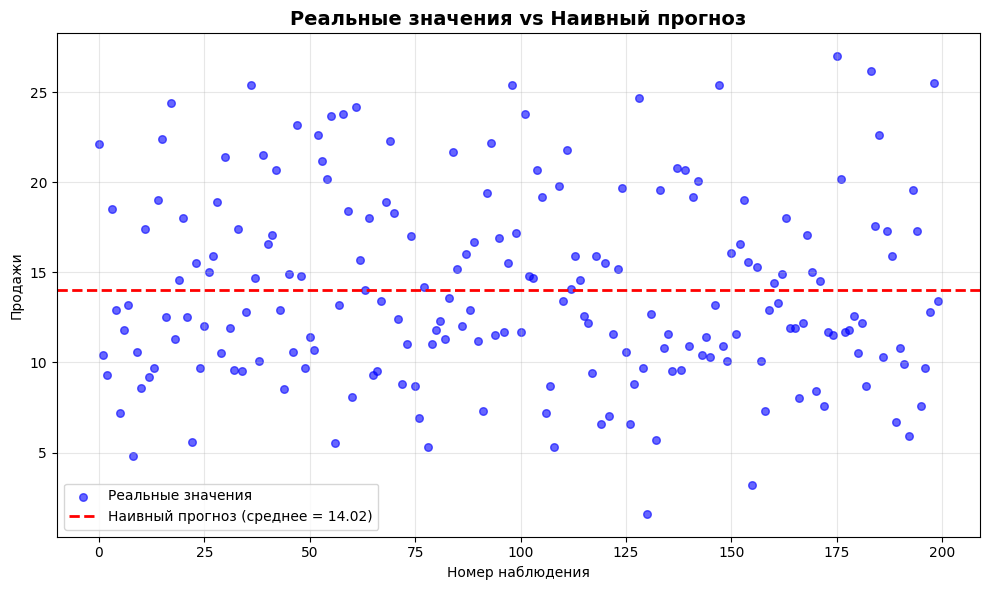

In [125]:
#ваш код

# Вычисляем среднее значение продаж (целевой переменной)
y_mean = np.mean(y)
print(f"Среднее значение продаж: {y_mean:.4f}")
# Создаем наивный прогноз - все предсказания равны среднему значению
y_naive_pred = np.full_like(y, y_mean)
# Рассчитываем MSE для наивного прогноза используя нашу функцию mse_error
mse_naive = mse_error(y, y_naive_pred)
print(f"MSE наивного прогноза: {mse_naive:.6f}")

# Создаем один график - сравнение реальных значений и наивного прогноза
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y.flatten(), alpha=0.6, color='blue', label='Реальные значения', s=30)
plt.axhline(y=y_mean, color='red', linestyle='--', linewidth=2, label=f'Наивный прогноз (среднее = {y_mean:.2f})')
plt.xlabel('Номер наблюдения')
plt.ylabel('Продажи')
plt.title('Реальные значения vs Наивный прогноз', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов**

In [126]:
#ваш код

# Вычисляет линейные предсказания по матрице признаков и вектору весов.
# Параметры:
# X : numpy array, shape (m, n) - матрица признаков (m наблюдений, n признаков)
# w : numpy array, shape (n, 1) или (n,) - вектор весов
# Возвращает:
# numpy array, shape (m, 1) - вектор предсказаний
# Формула: y_pred = X @ w (матричное произведение)

def lin_pred(X, w):
    w = np.array(w)
    if w.ndim == 1:
        w = w.reshape(-1, 1)
    # Проверяем совместимость размерностей
    if X.shape[1] != w.shape[0]:
        raise ValueError(f"Несовместимые размерности: X.shape[1]={X.shape[1]}, w.shape[0]={w.shape[0]}")
    # Вычисляем предсказания: y_pred = X * w
    y_pred = X @ w
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.  
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [127]:
#ваш код

# Выполняет один шаг стохастического градиентного спуска.
# Параметры:
# X : numpy array, shape (m, n) - матрица признаков
# y : numpy array, shape (m, 1) - вектор целевых значений  
# w : numpy array, shape (n, 1) - текущий вектор весов
# train_ind : int - индекс объекта обучающей выборки (строка матрицы X)
# eta : float - шаг градиентного спуска (learning rate)
# Возвращает:
# numpy array, shape (n, 1) - обновленный вектор весов
# Формула: w_j ← w_j - (2η/ℓ) * x_ij * ((x_i^T * w) - y_i)

def stoch_grad_step(X, y, w, train_ind, eta):
    # Приводим входные данные к нужным форматам
    w = np.array(w).reshape(-1, 1) if np.array(w).ndim == 1 else np.array(w)
    y = np.array(y).reshape(-1, 1) if np.array(y).ndim == 1 else np.array(y)
    
    # Получаем размерности
    m = X.shape[0]  # количество объектов в выборке
    
    # Получаем текущий объект обучающей выборки
    x_i = X[train_ind, :].reshape(1, -1)  # строка train_ind матрицы X, shape (1, n)
    y_i = y[train_ind]  # соответствующее целевое значение
    
    # Вычисляем предсказание для текущего объекта: x_i^T * w
    y_pred_i = x_i @ w  # shape (1, 1)
    
    # Вычисляем ошибку предсказания: (предсказание - реальное значение)
    error = y_pred_i - y_i  # shape (1, 1)
    
    # Вычисляем градиент: (2/ℓ) * x_i^T * error
    # x_i^T имеет shape (n, 1), error имеет shape (1, 1)
    gradient = (2.0 / m) * x_i.T * error  # shape (n, 1)
    
    # Обновляем веса: w ← w - η * gradient
    w_new = w - eta * gradient
    
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [128]:
# ваш код

# Реализует алгоритм стохастического градиентного спуска для линейной регрессии.
# Параметры:
# X : numpy array, shape (m, n) - матрица признаков
# y : numpy array, shape (m, 1) - вектор целевых значений
# w_start : numpy array, shape (n, 1) - начальные веса модели
# eta : float - темп обучения (learning rate)
# max_iter : int - максимальное количество итераций
# min_weight_dist : float - минимальное евклидово расстояние между весами для остановки
# Возвращает:
# w : numpy array, shape (n, 1) - финальные веса модели
# mse_errors : list - история ошибок MSE на каждой итерации

def stochastic_gradient_descent(X, y, w_start, eta, max_iter, min_weight_dist):
    # Инициализация
    w = np.array(w_start).reshape(-1, 1)  # убеждаемся в правильной размерности
    mse_errors = []  # пустой список для фиксации ошибок
    iteration = 0  # счетчик итераций
    weight_dist = np.inf  # расстояние между векторами весов (инициализируем большим числом)
       
    # Основной цикл обучения
    while weight_dist > min_weight_dist and iteration < max_iter:
        
        # Сохраняем текущие веса для вычисления расстояния
        w_old = w.copy()
        
        # Генерируем случайный индекс объекта обучающей выборки
        train_ind = np.random.randint(0, X.shape[0])
        
        # Вычисляем текущую ошибку на всей выборке и записываем в список
        y_pred = lin_pred(X, w)
        current_mse = mse_error(y, y_pred)
        mse_errors.append(current_mse)
        
        # Выполняем один шаг стохастического градиентного спуска
        w = stoch_grad_step(X, y, w, train_ind, eta)
        
        # Рассчитываем расстояние между старыми и новыми весами (евклидова норма)
        weight_dist = np.linalg.norm(w - w_old)
        
        # Увеличиваем счетчик итераций
        iteration += 1
        
        # Выводим прогресс каждые 10000 итераций
        if iteration % 10000 == 0:
            print(f"Итерация {iteration}: MSE = {current_mse:.6f}, Weight distance = {weight_dist:.8f}")
    
    # Вычисляем финальную ошибку
    final_y_pred = lin_pred(X, w)
    final_mse = mse_error(y, final_y_pred)
    mse_errors.append(final_mse)
    
    # Выводим результат
    print(f"Причина остановки: ", end="")
    if weight_dist <= min_weight_dist:
        print(f"достигнуто минимальное расстояние ({weight_dist:.8f} <= {min_weight_dist})")
    else:
        print(f"достигнуто максимальное количество итераций ({iteration})")
    
    print(f"Итераций выполнено: {iteration}")
    print(f"Финальная MSE: {final_mse:.6f}")
    print(f"Финальное расстояние между весами: {weight_dist:.8f}")
    print(f"Финальные веса: {w.flatten()}")
    
    return w, mse_errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [129]:
# ваш код

# Параметры для запуска
w_start_full = np.zeros((X.shape[1], 1))  # начальные веса - нули
eta_full = 0.01                           # темп обучения
max_iter_full = 100000                    # 10^5 итераций
min_weight_dist_full = 1e-10              # очень маленькое расстояние для остановки

# Установка seed для воспроизводимости результатов
np.random.seed(42)

# Запуск SGD
start_time = time.time()
w_final_sgd, mse_history_sgd = stochastic_gradient_descent(X, y, w_start_full, eta_full, max_iter_full, min_weight_dist_full)
end_time = time.time()
execution_time = end_time - start_time

Итерация 10000: MSE = 32.790165, Weight distance = 0.00157759
Итерация 20000: MSE = 6.960759, Weight distance = 0.00136736
Итерация 30000: MSE = 3.345512, Weight distance = 0.00026680
Итерация 40000: MSE = 2.866425, Weight distance = 0.00020507
Итерация 50000: MSE = 2.794577, Weight distance = 0.00005809
Итерация 60000: MSE = 2.786896, Weight distance = 0.00019470
Итерация 70000: MSE = 2.786452, Weight distance = 0.00001191
Итерация 80000: MSE = 2.784403, Weight distance = 0.00014697
Итерация 90000: MSE = 2.784591, Weight distance = 0.00060599
Итерация 100000: MSE = 2.786430, Weight distance = 0.00071394
Причина остановки: достигнуто максимальное количество итераций (100000)
Итераций выполнено: 100000
Финальная MSE: 2.786369
Финальное расстояние между весами: 0.00071394
Финальные веса: [14.01961682  3.94909052  2.76783147 -0.04537642]


**Выведите вектор весов, к которому сошелся метод.**

In [130]:
# ваш код

# Выводим как numpy массив
print(f"\nВектор весов как numpy массив:")
print(f"w = {w_final_sgd.flatten()}")


Вектор весов как numpy массив:
w = [14.01961682  3.94909052  2.76783147 -0.04537642]


**Выведите среднеквадратичную ошибку на последней итерации.**

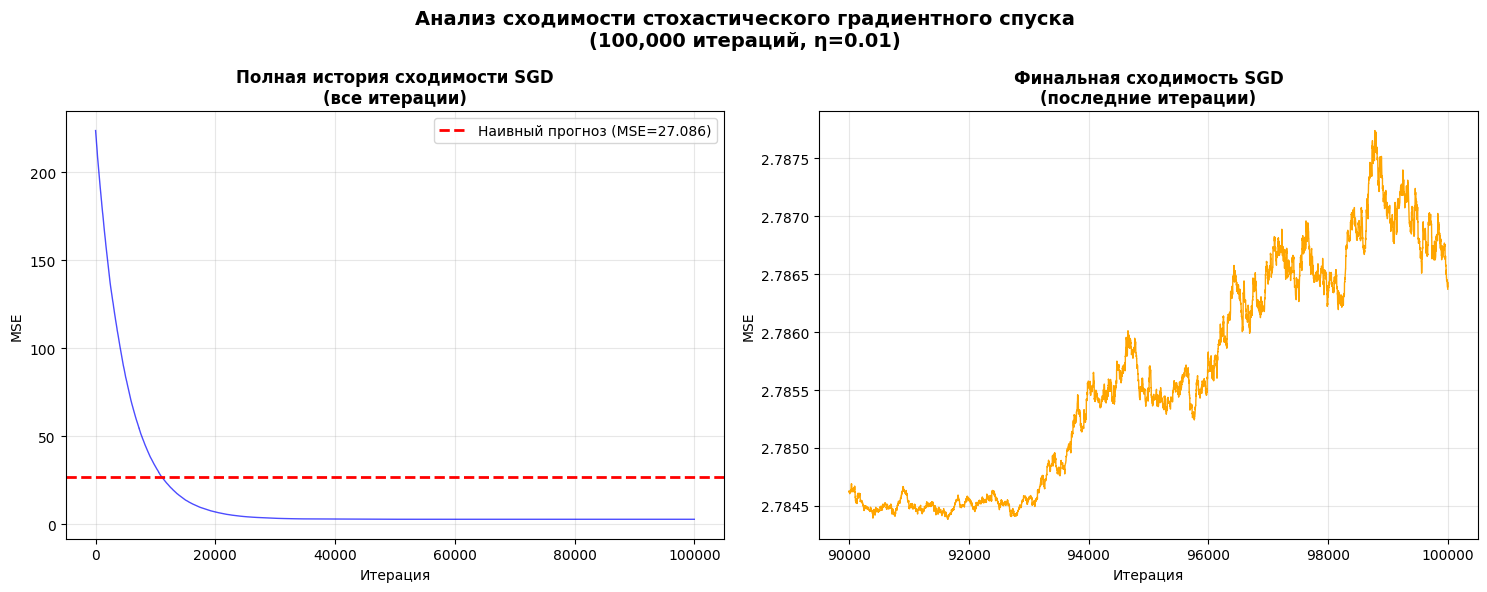

Время выполнения: 4.26 секунд
Выполнено итераций: 100,000
Начальная MSE: 223.716250
Финальная MSE: 2.786369
Улучшение MSE: 220.929881
Процент улучшения: 98.75%

Ответ: Финальная MSE = 2.786369


In [131]:
# ваш код

# Построение графика зависимости ошибки от номера итерации
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Полная история сходимости
axes[0].plot(mse_history_sgd, 'b-', alpha=0.7, linewidth=1)
axes[0].set_title('Полная история сходимости SGD\n(все итерации)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Итерация')
axes[0].set_ylabel('MSE')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=mse_naive, color='red', linestyle='--', linewidth=2, 
                label=f'Наивный прогноз (MSE={mse_naive:.3f})')
axes[0].legend()

# График 2: Последние 10000 итераций для финальной сходимости
start_idx = max(0, len(mse_history_sgd) - 10000)
axes[1].plot(range(start_idx, len(mse_history_sgd)), mse_history_sgd[start_idx:], 'orange', linewidth=1)
axes[1].set_title('Финальная сходимость SGD\n(последние итерации)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Итерация')
axes[1].set_ylabel('MSE')
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'Анализ сходимости стохастического градиентного спуска\n'
             f'({len(mse_history_sgd)-1:,} итераций, η={eta_full})', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Время выполнения: {execution_time:.2f} секунд")
print(f"Выполнено итераций: {len(mse_history_sgd) - 1:,}")
print(f"Начальная MSE: {mse_history_sgd[0]:.6f}")
print(f"Финальная MSE: {mse_history_sgd[-1]:.6f}")
print(f"Улучшение MSE: {mse_history_sgd[0] - mse_history_sgd[-1]:.6f}")
print(f"Процент улучшения: {((mse_history_sgd[0] - mse_history_sgd[-1]) / mse_history_sgd[0] * 100):.2f}%")

print(f"\nОтвет: Финальная MSE = {mse_history_sgd[-1]:.6f}")

> **Вывод по проделанной работе:**
> 
> Реализованы и сравнены два алгоритма оптимизации
> - *Координатный спуск* 
> - *Стохастический градиентный спуск (SGD)*
>
> **1. Подготовка данных датасет Advertising.csv**
> - 200 наблюдений, 3 признака (TV, radio, newspaper)
> - Целевая переменная: sales
> - Пропуски и дубликаты отсутствуют
> 
> **2. Реализован алгоритм координатного спуска:**
> - Количество итераций: 1,000
> - Финальная MSE: ~2.784
> - Сходимость: Быстрая, стабильная
> - Результаты практически идентичны sklearn.LinearRegression
> 
> **3. Созданы функции для Стохастический градиентный спуска**
> - Функция `lin_pred()` - вычисление предсказаний
> - Функция `stoch_grad_step()` - один шаг SGD 
> - Функция `stochastic_gradient_descent()` - полный алгоритм
> - Функция `mse_error()` - вычисление ошибки
>  
> **4. Итоговые метрики SGD (Стохастический градиентный спуск) и сравнение с базовыми метриками**
> - Наивный прогноз (по среднему значению) MSE: 27.05
> - SGD Финальная MSE: 2.786
> - Улучшение над наивным: 89.71%
>
> **5. Оба метода показали хорошие результаты, MSE = ~2.78**